# Analysing survey data

In this notebook we take a short trip into how we can visualize the results of a survery data. 

Let us import the dataset

In [23]:
import numpy as np  
import pandas as pd
url = "https://cocl.us/datascience_survey_data"
df_proj = pd.read_csv(url,index_col=0)

df_proj

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


Check if there are null datasets

In [24]:
df_proj.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, Big Data (Spark / Hadoop) to Machine Learning
Data columns (total 3 columns):
Very interested        6 non-null int64
Somewhat interested    6 non-null int64
Not interested         6 non-null int64
dtypes: int64(3)
memory usage: 192.0+ bytes


Summming up the number of respondents on each category we get that

In [25]:
df_proj.sum(1)

Big Data (Spark / Hadoop)     2188
Data Analysis / Statistics    2192
Data Journalism               2120
Data Visualization            2176
Deep Learning                 2169
Machine Learning              2180
dtype: int64

In [26]:
df_proj.shape

(6, 3)

In [27]:
df_proj.sort_values(by='Very interested', ascending=False, inplace=True)
df_proj1 = df_proj['Very interested']
df_proj1

Data Analysis / Statistics    1688
Machine Learning              1629
Data Visualization            1340
Big Data (Spark / Hadoop)     1332
Deep Learning                 1263
Data Journalism                429
Name: Very interested, dtype: int64

In [28]:
df_proj.sort_values(by='Very interested', ascending=False, inplace=True)
df_proj2 = df_proj['Somewhat interested']
df_proj2

Data Analysis / Statistics     444
Machine Learning               477
Data Visualization             734
Big Data (Spark / Hadoop)      729
Deep Learning                  770
Data Journalism               1081
Name: Somewhat interested, dtype: int64

In [29]:
df_proj.sort_values(by='Very interested', ascending=False, inplace=True)
df_proj3 = df_proj['Not interested']
df_proj3

Data Analysis / Statistics     60
Machine Learning               74
Data Visualization            102
Big Data (Spark / Hadoop)     127
Deep Learning                 136
Data Journalism               610
Name: Not interested, dtype: int64

In [30]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  2.2.3


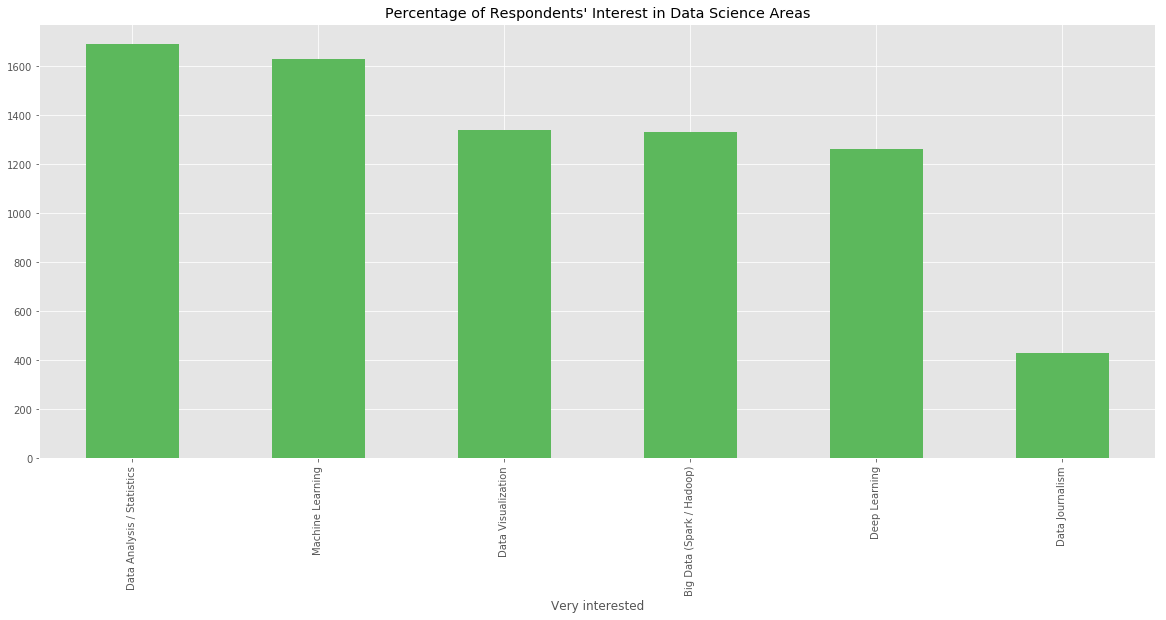

In [31]:
# generate plot
df_proj1.plot(kind='bar', figsize=(20, 8), color='#5cb85c')
plt.xlabel('Very interested')
plt.title('Percentage of Respondents\' Interest in Data Science Areas')
# annotate value labels to each country
#for index, value in enumerate(df_proj1): 
 #   label = format(int(value), ',') # format int with commas
# place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
  #  plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')
    
plt.show()

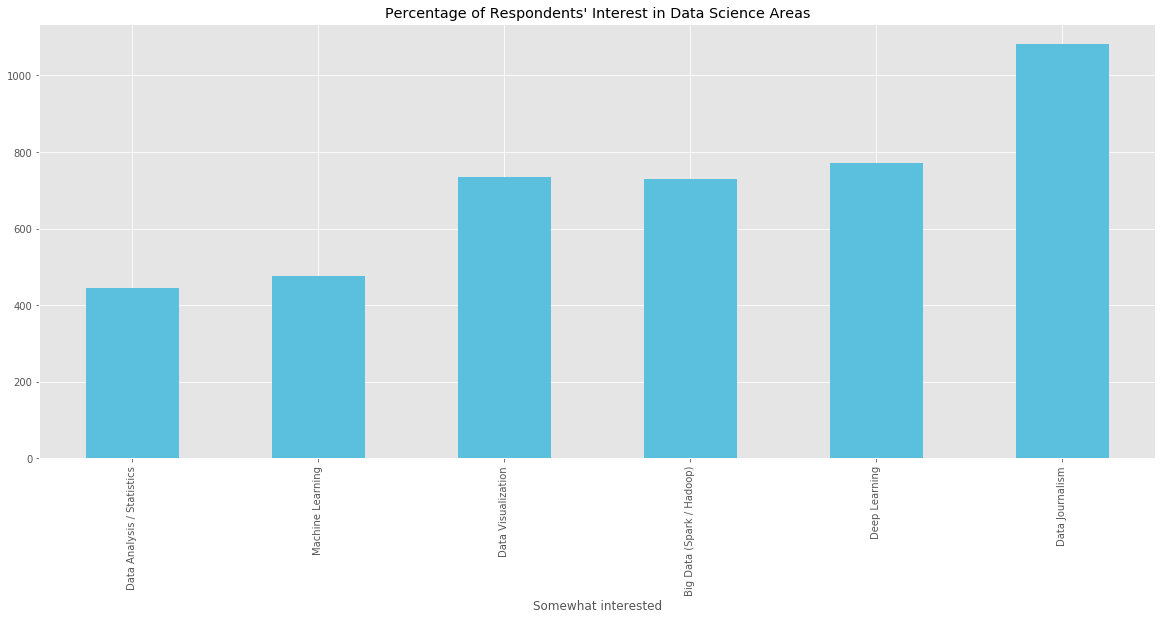

In [32]:
# generate plot
df_proj2.plot(kind='bar', figsize=(20, 8), color='#5bc0de')
plt.xlabel('Somewhat interested')
plt.title('Percentage of Respondents\' Interest in Data Science Areas')
# annotate value labels to each country
#for index, value in enumerate(df_proj1): 
 #   label = format(int(value), ',') # format int with commas
# place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
  #  plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')
    
plt.show()

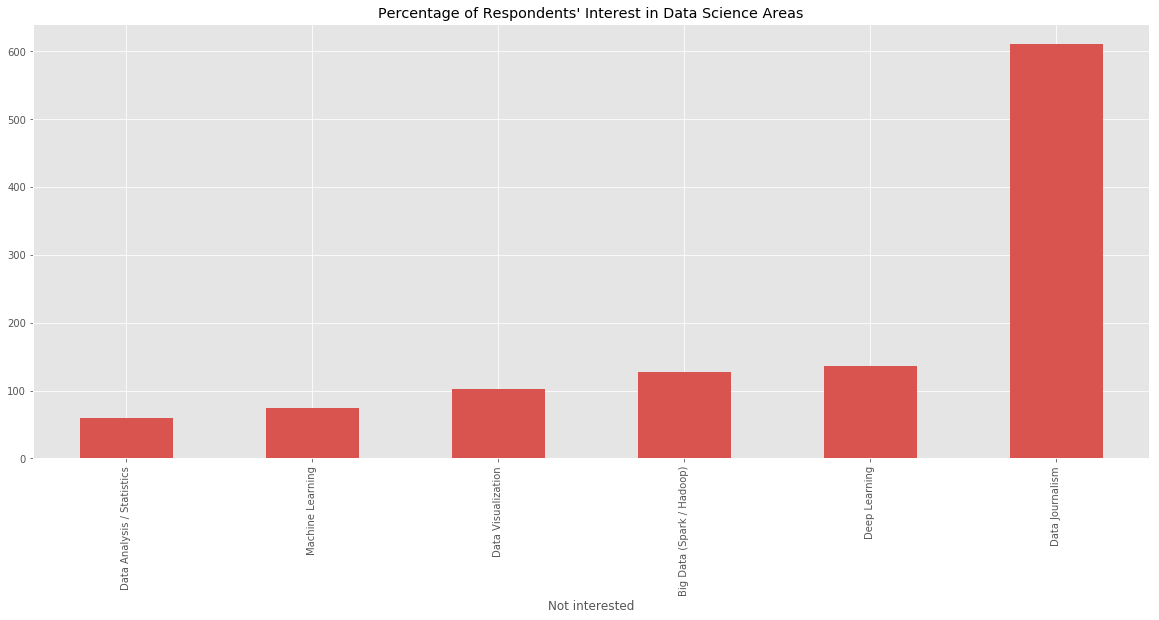

In [33]:
# generate plot
df_proj3.plot(kind='bar', figsize=(20, 8), color='#d9534f')
plt.xlabel('Not interested')
plt.title('Percentage of Respondents\' Interest in Data Science Areas')
# annotate value labels to each country
#for index, value in enumerate(df_proj1): 
 #   label = format(int(value), ',') # format int with commas
# place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
  #  plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')
    
plt.show()

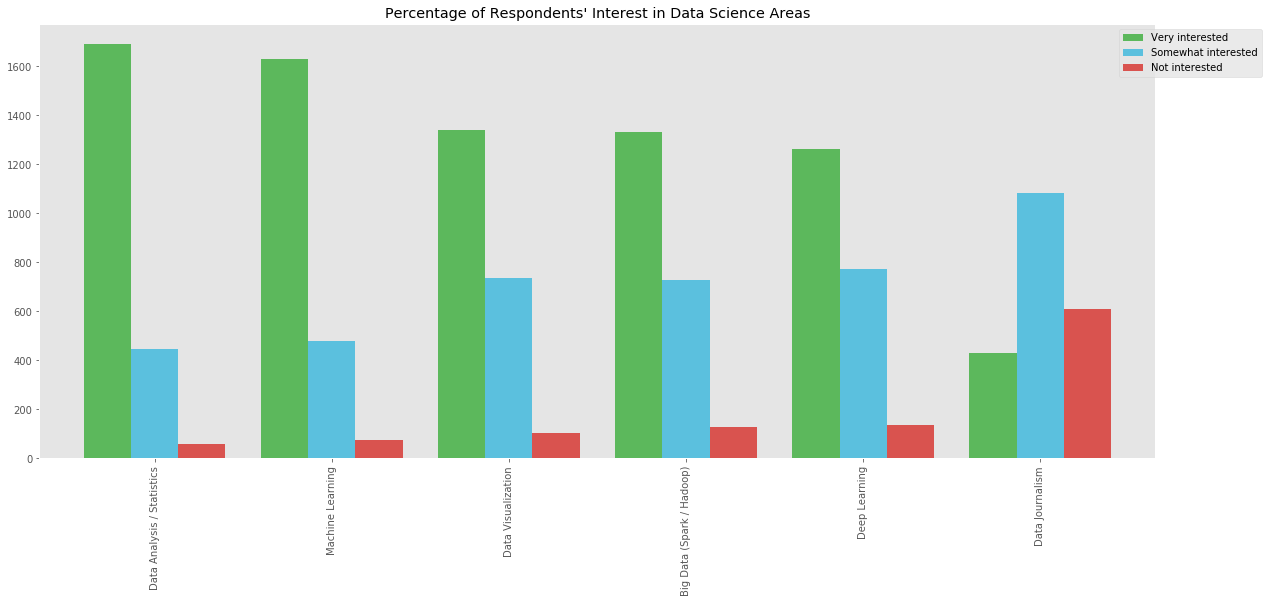

In [34]:
groups = [df_proj1,df_proj2,df_proj3]
group_labels = ['Very interested', 'Somewhat interested','Not interested']
colors_list = ['#5cb85c', '#5bc0de', '#d9534f']

# Convert data to pandas DataFrame.
df = pd.DataFrame(groups, index=group_labels).T

# Plot.
pd.concat(
    [df_proj1, df_proj2, 
     df_proj3],
    axis=1).plot.bar(title='Percentage of Respondents\' Interest in Data Science Areas',grid=False,width=0.8,figsize=(20, 8), color=colors_list).legend(bbox_to_anchor=(1.1, 1))

In [35]:
#Number of respondents in percentage
df_proj1p=(df_proj1/2233)*100
df_proj1p

Data Analysis / Statistics    75.593372
Machine Learning              72.951187
Data Visualization            60.008957
Big Data (Spark / Hadoop)     59.650694
Deep Learning                 56.560681
Data Journalism               19.211823
Name: Very interested, dtype: float64

In [36]:
#Number of respondents in percentage
df_proj2p=(df_proj2/2233)*100
df_proj2p

Data Analysis / Statistics    19.883565
Machine Learning              21.361397
Data Visualization            32.870578
Big Data (Spark / Hadoop)     32.646664
Deep Learning                 34.482759
Data Journalism               48.410210
Name: Somewhat interested, dtype: float64

In [37]:
#Number of respondents in percentage
df_proj3p=(df_proj3/2233)*100
df_proj3p

Data Analysis / Statistics     2.686968
Machine Learning               3.313927
Data Visualization             4.567846
Big Data (Spark / Hadoop)      5.687416
Deep Learning                  6.090461
Data Journalism               27.317510
Name: Not interested, dtype: float64

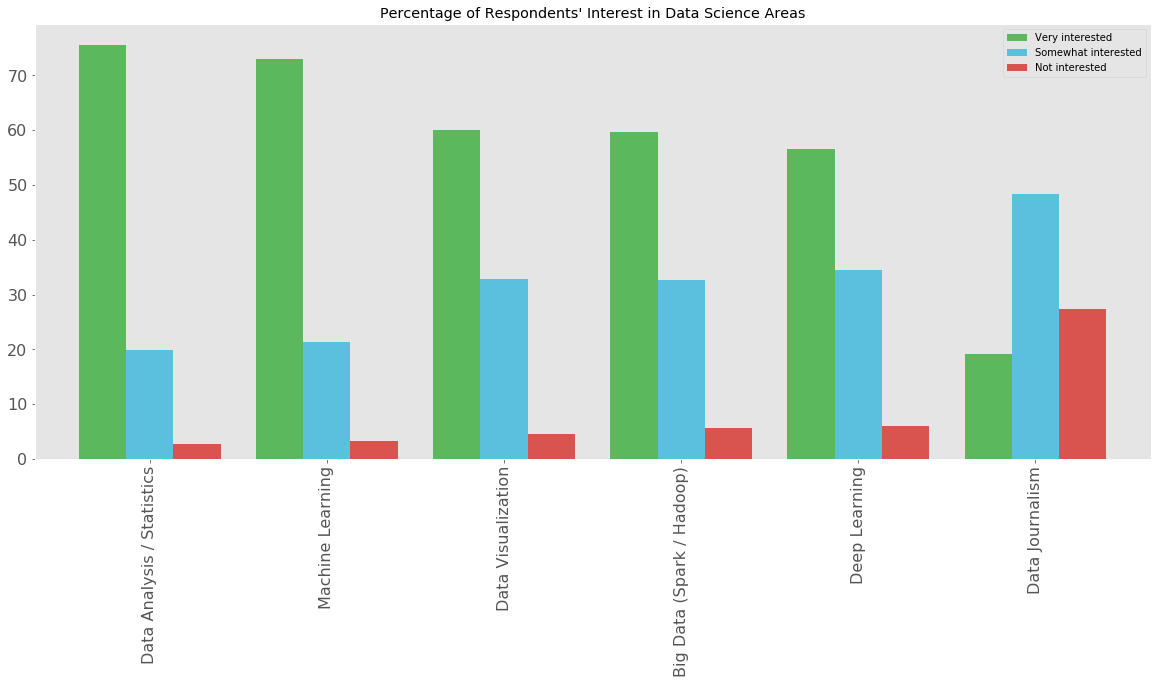

In [38]:
groups = [df_proj1/2233, df_proj2/2233, df_proj3/2233]
group_labels = ['Very interested', 'Somewhat interested','Not interested']
colors_list = ['#5cb85c', '#5bc0de', '#d9534f']

# Convert data to pandas DataFrame.
df = pd.DataFrame(groups, index=group_labels).T

# Plot.
pd.concat(
    [(df_proj1/2233)*100, (df_proj2/2233)*100, 
     (df_proj3/2233)*100],
    axis=1).plot.bar(title='Percentage of Respondents\' Interest in Data Science Areas',
                     fontsize=16,grid=False,width=0.8,figsize=(20, 8), 
                     color=colors_list,legend='upper right')


Text(0.5,1,"Percentage of Respondents' Interest in Data Science Areas")

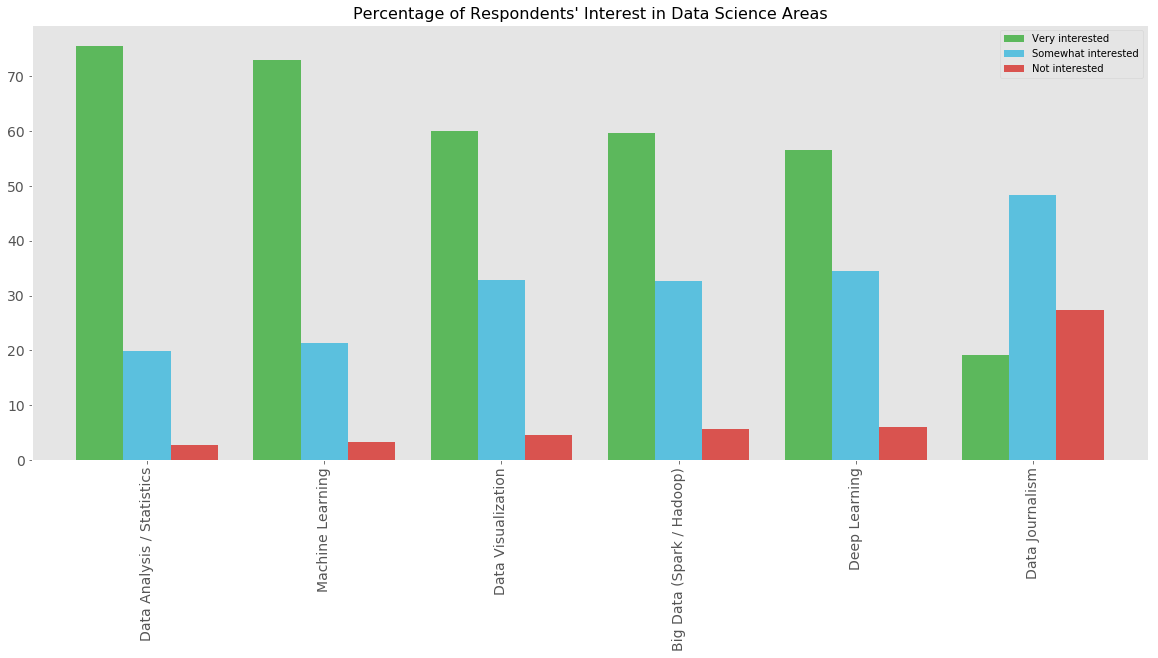

In [39]:
groups = [df_proj1/2233, df_proj2/2233, df_proj3/2233]
group_labels = ['Very interested', 'Somewhat interested','Not interested']
colors_list = ['#5cb85c', '#5bc0de', '#d9534f']

# Convert data to pandas DataFrame.
df = pd.DataFrame(groups, index=group_labels).T

# Plot.
pd.concat(
    [(df_proj1/2233)*100, (df_proj2/2233)*100, 
     (df_proj3/2233)*100],
    axis=1).plot.bar(title='Percentage of Respondents\' Interest in Data Science Areas',
                     fontsize=14,grid=False,width=0.8,figsize=(20, 8), 
                     color=colors_list,legend='upper right')
plt.title('Percentage of Respondents\' Interest in Data Science Areas',fontsize=16)


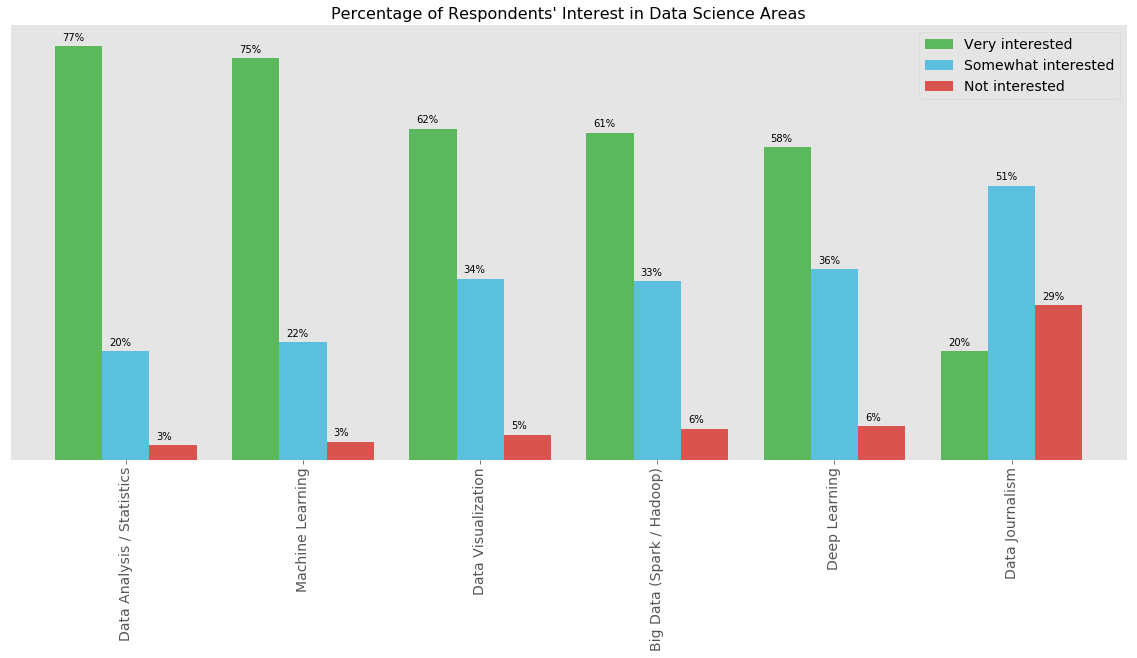

In [40]:
colors_list = ['#5cb85c','#5bc0de','#d9534f']

# Change this line to plot percentages instead of absolute values
ax = (df_proj.div(df_proj.sum(1), axis=0)).plot(kind='bar',figsize=(20,8),width = 0.8,color = colors_list,edgecolor=None)
plt.legend(labels=df_proj.columns,fontsize= 14)
plt.title("Percentage of Respondents' Interest in Data Science Areas",fontsize= 16)
plt.grid(False)
plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

# Add this loop to add the annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (p.get_x()+.15*width, p.get_y() + height + 0.01))


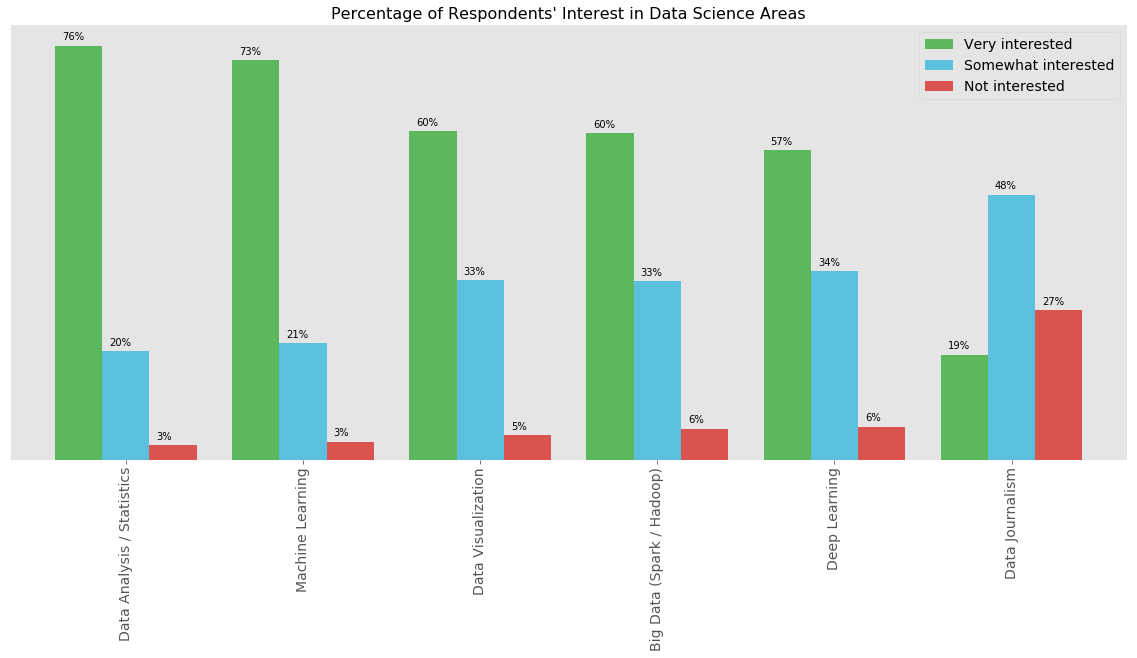

In [41]:
colors_list = ['#5cb85c','#5bc0de','#d9534f']

# Change this line to plot percentages instead of absolute values
ax = (df_proj.div(2233, axis=0)).plot(kind='bar',figsize=(20,8),width = 0.8,color = colors_list,edgecolor=None)
plt.legend(labels=df_proj.columns,fontsize= 14)
plt.title("Percentage of Respondents' Interest in Data Science Areas",fontsize= 16)
plt.grid(False)
plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

# Add this loop to add the annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (p.get_x()+.15*width, p.get_y() + height + 0.01))


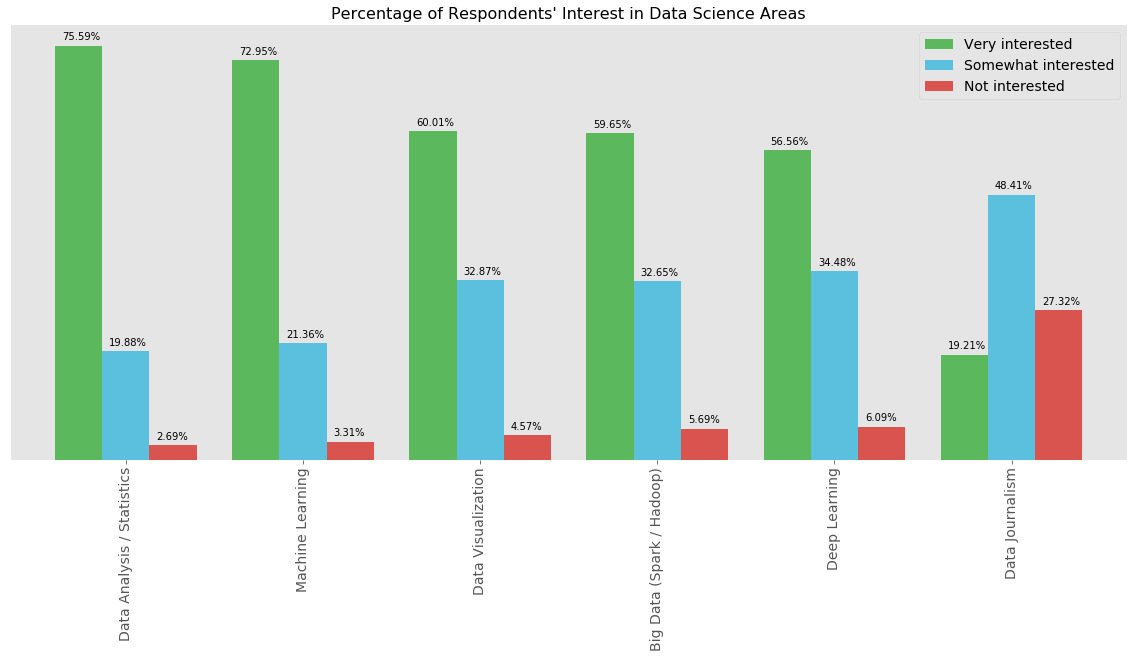

In [42]:
#The following rounds the percentage two 2 decimal places and removes top, right and left frames only

colors_list = ['#5cb85c','#5bc0de','#d9534f']

# Change this line to plot percentages instead of absolute values
ax = (df_proj.div(2233, axis=0)).plot(kind='bar',figsize=(20,8),width = 0.8,color = colors_list,edgecolor=None)
plt.legend(labels=df_proj.columns,fontsize= 14)
plt.title("Percentage of Respondents' Interest in Data Science Areas",fontsize= 16)
plt.grid(False)
plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

# Add this loop to add the annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.2%}'.format(height), (p.get_x()+.15*width, p.get_y() + height + 0.01))


The following rounds the percentage two 2 decimal places and removes top, right and left frames only

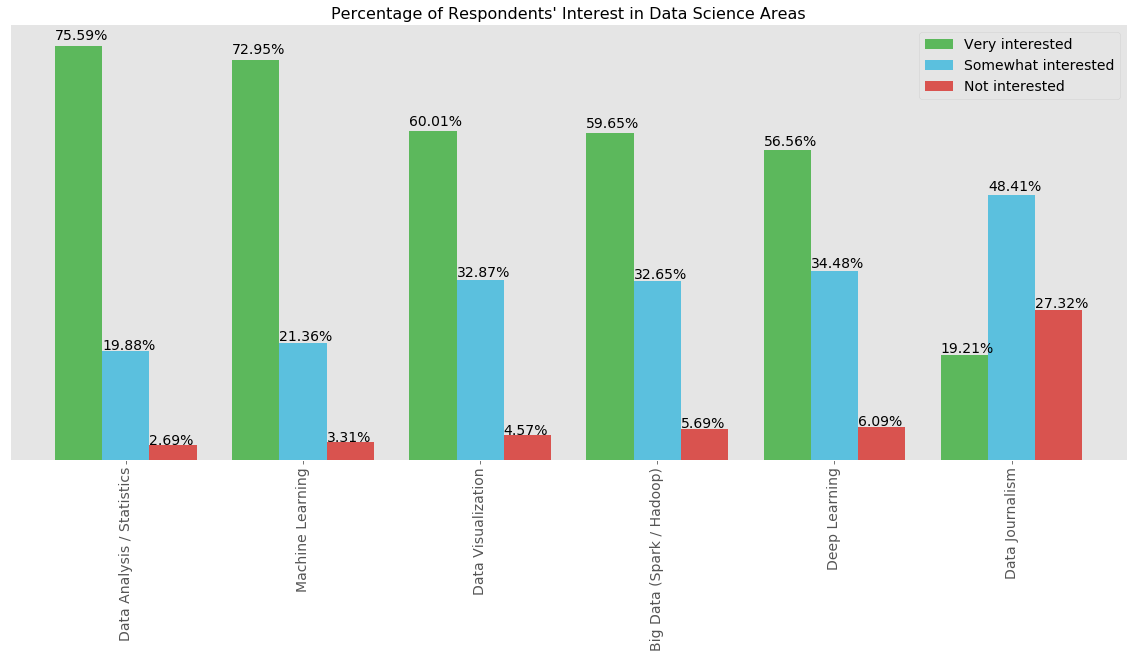

In [43]:
#The following rounds the percentage two 2 decimal places and removes top, right and left frames only
colors_list = ['#5cb85c','#5bc0de','#d9534f']

# Change this line to plot percentages instead of absolute values
ax = (df_proj.div(2233, axis=0)).plot(kind='bar',figsize=(20,8),width = 0.8,color = colors_list,edgecolor=None)
plt.legend(labels=df_proj.columns,fontsize= 14)
plt.title("Percentage of Respondents' Interest in Data Science Areas",fontsize= 16)
plt.grid(False)
plt.xticks(fontsize=14)
#for spine in plt.gca().spines.values():
 #   spine.set_visible(False)
plt.yticks([])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
# Add this loop to add the annotations
for p in ax.patches:
    ax.annotate(str(round(p.get_height()*100,2))+"%", \
    (p.get_x() * 1.000, p.get_height() * 1.015), fontsize=14)
    
    

This notebook was created by [Dawit H. Hailu (PhD)](https://www.linkedin.com/in/dawit-h-hailu-ph-d-4b7b8787/)

*This work was part of an assignmnet on coursera course*